# Исходные данные:
Объясняем работу примера style transfer (красивые примеры тут, colab)

In [1]:
!pip install accelerate
!pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 4.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [2]:
!pip install Pillow==10.1.0
!pip install torch==2.1.2
!pip install torchvision==0.16.2
!pip install transformers==4.40.0
!pip install accelerate==0.30.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 14.4 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.1.0 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 MB 9.6 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 2.3.0
    Uninstalling triton-2.3.0:
      Successfully uninstalled triton-2.3.0
  Attempting uninstall: nvidia-nccl-cu12
    Found existing installation: nvidia-nccl-cu12 2.20.5
    Uninstalling nvidia-nccl-cu12-2.20.5:
      Successfully uninstalled nvidia-nccl-cu12-2.20.5
  Attempting uninstall: torch
    Found existing installation: torch 2.3.0+cu121
    Uninstalling torch-2.3.0+cu121:
      Successfully uninstalled torch-2.3.0+cu121
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.3.0+cu121 requires torch==2.3.0, but you have torch 2.1

In [3]:
!pip install Pillow
!pip install torch
!pip install torchvision
!pip install transformers
!pip install accelerate

**1. Сокращение длинного текста (summarization)** <br>
https://huggingface.co/facebook/bart-large-cnn

In [4]:
from transformers import pipeline

# Создаем пайплайн для суммаризации
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Текст статьи
ARTICLE = """ Dolphins are wonderful and smart creatures that live in oceans around the world.
They are mammals, which means they breathe air just like humans do. Dolphins have smooth skin and come in different colors like gray and blue.
These friendly animals are known for their playful behavior and the way they jump out of the water.
They live in groups called pods and communicate with each other using clicks and whistles.
Dolphins are really good swimmers and can swim very fast. Dolphins are very intelligent.
They can learn tricks and even understand signals from humans. Some dolphins help people by working with them in the ocean.
Dolphins eat fish and squid, so they are called carnivores.
They use their sharp teeth to catch their food. People all over the world love dolphins and enjoy watching them in the wild.
"""

# Выполняем суммаризацию
summary_1 = summarizer(ARTICLE, max_length=35, min_length=10, do_sample=False)
summary_2 = summarizer(ARTICLE, max_length=5, min_length=1, do_sample=False)

# Выводим результат
print(summary_1)
print(summary_2)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

[{'summary_text': 'Dolphins are mammals, which means they breathe air just like humans do. They live in groups called pods and communicate with each other using clicks and whistles.'}]
[{'summary_text': 'Dolphins'}]


**2. Сгенерируем изображение с помощью модели стабильной диффузии** <br>
https://huggingface.co/VikramSingh178/sdxl-lora-finetune-product-caption/blob/main/README.md?code=true

In [5]:
pip install invisible_watermark transformers accelerate safetensors diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.3 MB/s eta 0:00:00


Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

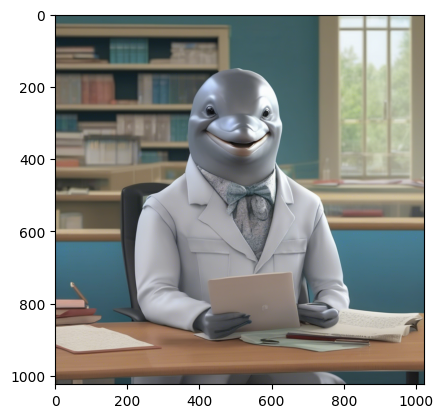

In [7]:
from diffusers import DiffusionPipeline
import torch
import matplotlib.pyplot as plt

# Загружаем и настраиваем модель
pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
pipe.to("cuda")

# if using torch < 2.0
# pipe.enable_xformers_memory_efficient_attention()

# Генерируем изображение на основе текста
prompt = "Dolphin professor at the university"
images = pipe(prompt=prompt).images[0]

# Отображаем изображение
plt.imshow(images)

**3. Сегментация изображения (image segmentation)**<br>
https://huggingface.co/briaai/RMBG-1.4

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


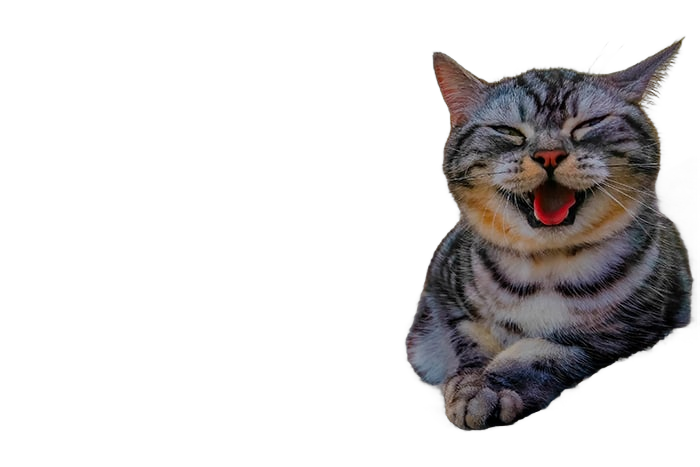

In [7]:
from transformers import pipeline
# Load model directly
from transformers import AutoModelForImageSegmentation
model = AutoModelForImageSegmentation.from_pretrained("briaai/RMBG-1.4", trust_remote_code=True)

# URL изображения
image_path = "https://pro-kotikov.ru/wp-content/uploads/2020/06/cat-beach-sea-photo-4.jpg"
# Загрузка модели сегментации изображений
pipe = pipeline("image-segmentation", model="briaai/RMBG-1.4", trust_remote_code=True)
# Получение маски сегментации
pillow_mask = pipe(image_path, return_mask = True) # outputs a pillow mask
# Получение изображения с примененной маской
pillow_image = pipe(image_path) # applies mask on input and returns a pillow image
# Отображение изображения с примененной маской
pillow_image

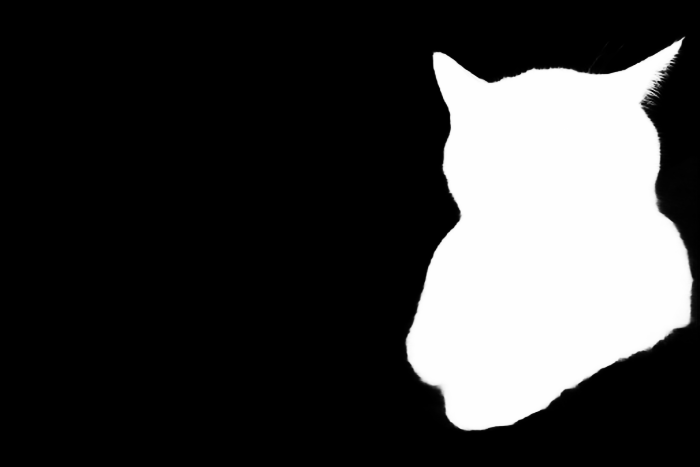

In [2]:
# Отображение маски сегментации
pillow_mask

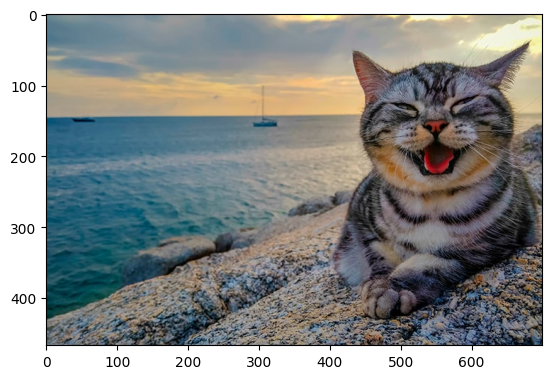

In [6]:
# Оригинал изображения
import requests
from PIL import Image
import matplotlib.pyplot as plt
url = "https://pro-kotikov.ru/wp-content/uploads/2020/06/cat-beach-sea-photo-4.jpg"
image = Image.open(requests.get(url, stream=True).raw)
plt.imshow(image);

**4. Классификация изображения (image classification)** <br>
https://huggingface.co/google/vit-base-patch16-384

In [8]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import requests

# Загрузка изображения
url = "https://pro-kotikov.ru/wp-content/uploads/2020/06/cat-beach-sea-photo-4.jpg"
image = Image.open(requests.get(url, stream=True).raw)
# Загрузка предобученной модели и экстрактора признаков
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-384')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-384')

# Предобработка изображения
inputs = feature_extractor(images=image, return_tensors="pt")

# Прогон изображения через модель
outputs = model(**inputs)
logits = outputs.logits

# model predicts one of the 1000 ImageNet classes
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/347M [00:00<?, ?B/s]

Predicted class: Egyptian cat


**5. Вопрос-ответ (question answering)**

In [9]:
from transformers import pipeline

# Создание пайплайна для вопрос-ответа
question_answerer = pipeline(
    "question-answering",
    model="Den4ikAI/rubert-large-squad",
    tokenizer="Den4ikAI/rubert-large-squad"
)

# Текст
context = """ Дельфины считаются одними из самых умных животных на Земле.
Они обладают высоким уровнем интеллекта и проявляют различные формы сложного поведения,
которые свидетельствуют о их высокой умственной способности.
Одной из наиболее известных особенностей интеллекта дельфинов является их способность
к обучению и общению. Они обладают сложной системой коммуникации и используют разнообразные
звуки и жесты, чтобы передавать сообщения друг другу. Исследования показывают, что дельфины могут
обучаться, понимать символы и выполнять сложные интеллектуальные задачи.
"""

# Вопрос
question = "Какие животные считаются одними из самых умных на Земле?"

# Получение ответа на вопрос
result = question_answerer(question=question, context=context)

# Вывод результата
print(f"Answer: {result['answer']}")

config.json:   0%|          | 0.00/712 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/713M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/43.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.78M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Answer: Дельфины
